# Tornado Project - Historical vs. Recent Occurrences

I began by comparing historical tornado occurrences inside and outside of tornado alley to see how their yearly tornado counts compare. 

### Historical Occurrences

In [1]:
# importing our packages
import pandas as pd
import matplotlib.pyplot as plt

# loading the data from historical occurrence tables into DataFrames
historical_data_inside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Historical_Tornado_Occurrences_Inside.xlsx")
historical_data_outside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Historical_Tornado_Occurrences_Outside.xlsx")


In [2]:
# extracting relevant columns from the DataFrames
years_inside = historical_data_inside['Year']
states_inside = historical_data_inside['State']
tornado_counts_inside = historical_data_inside['Tornado_Count']

years_outside = historical_data_outside['Year']
states_outside = historical_data_outside['State']
tornado_counts_outside = historical_data_outside['Tornado_Count']


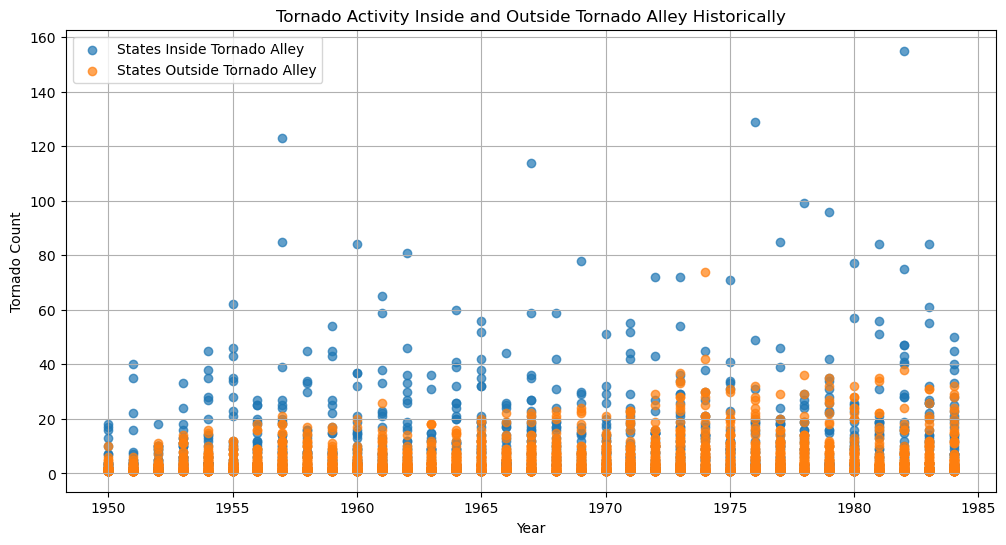

In [3]:
# creating a basic scatter plot to visualize tornado activity inside and outside Tornado Alley over time
plt.figure(figsize=(12, 6))
plt.scatter(years_inside, tornado_counts_inside, label='States Inside Tornado Alley', alpha=0.7)
plt.scatter(years_outside, tornado_counts_outside, label='States Outside Tornado Alley', alpha=0.7)

# customizing the plot
plt.title('Tornado Activity Inside and Outside Tornado Alley Historically')
plt.xlabel('Year')
plt.ylabel('Tornado Count')
plt.legend()
plt.grid()

# showing the plot
plt.show()

Already, we can see that, on average, there are historically more tornadoes in states in Tornado Alley than outside Tornado Alley. How does this compare to more recent data?

### Recent Occurrences

In [4]:
# loading in the data from historical occurrence tables into DataFrames
recent_data_inside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Recent_Tornado_Occurrences_Inside.xlsx")
recent_data_outside = pd.read_excel(r"C:\Users\lemcm\OneDrive\Project files\Recent_Tornado_Occurrences_Outside.xlsx")


In [5]:
# extracting relevant columns from the DataFrames
years_inside = recent_data_inside['Year']
states_inside = recent_data_inside['State']
tornado_counts_inside = recent_data_inside['Tornado_Count']

years_outside = recent_data_outside['Year']
states_outside = recent_data_outside['State']
tornado_counts_outside = recent_data_outside['Tornado_Count']


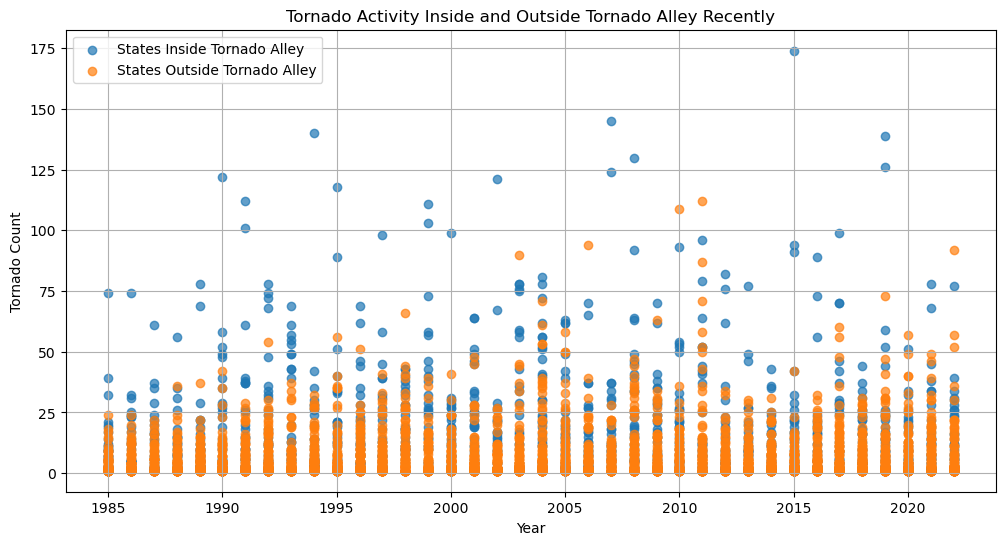

In [6]:
# creating another basic scatter plot to visualize tornado activity inside and outside Tornado Alley over time
plt.figure(figsize=(12, 6))
plt.scatter(years_inside, tornado_counts_inside, label='States Inside Tornado Alley', alpha=0.7)
plt.scatter(years_outside, tornado_counts_outside, label='States Outside Tornado Alley', alpha=0.7)

# customizing the plot
plt.title('Tornado Activity Inside and Outside Tornado Alley Recently')
plt.xlabel('Year')
plt.ylabel('Tornado Count')
plt.legend()
plt.grid()

# showing the plot
plt.show()


One thing I immediately notice is the increase of tornadoes in the states outside Tornado Alley. This may signify a shift in the geography of tornado occurrence to the Central-Southeastern United States. 

### Statistical Analysis (ANOVA)

Let’s explore this further. I used ANOVA testing to compare historical and recent data inside and outside Tornado Alley. 

In [7]:
# importing package for ANOVA test
from scipy.stats import f_oneway

# performing ANOVA tests to compare historical and recent data for inside Tornado Alley
f_statistic_inside, p_value_inside = f_oneway(
    historical_data_inside['Tornado_Count'],
    recent_data_inside['Tornado_Count']
)

# performing ANOVA tests to compare historical and recent data for outside Tornado Alley
f_statistic_outside, p_value_outside = f_oneway(
    historical_data_outside['Tornado_Count'],
    recent_data_outside['Tornado_Count']
)

# printing the results for inside Tornado Alley
print("Inside Tornado Alley:")
print("F-statistic:", f_statistic_inside)
print("P-value:", p_value_inside)

# determining if the differences are statistically significant
alpha = 0.05
if p_value_inside < alpha:
    print("There is a statistically significant difference between historical and recent data inside Tornado Alley.")
else:
    print("There is no statistically significant difference between historical and recent data inside Tornado Alley.")

# printing the results for outside Tornado Alley
print("\nOutside Tornado Alley:")
print("F-statistic:", f_statistic_outside)
print("P-value:", p_value_outside)

# determining if the differences are statistically significant
if p_value_outside < alpha:
    print("There is a statistically significant difference between historical and recent data outside Tornado Alley.")
else:
    print("There is no statistically significant difference between historical and recent data outside Tornado Alley.")


Inside Tornado Alley:
F-statistic: 47.23487944069691
P-value: 8.055248561081716e-12
There is a statistically significant difference between historical and recent data inside Tornado Alley.

Outside Tornado Alley:
F-statistic: 124.80662384894124
P-value: 1.1665549736834883e-28
There is a statistically significant difference between historical and recent data outside Tornado Alley.


The results of this test imply there has been a significant change in the amount of tornadoes occurring inside and outside of Tornado Alley, but how do we know if tornadoes are increasing or decreasing in these areas? To analyze this, I used Linear Regression Analysis.

### Linear Regression Analysis

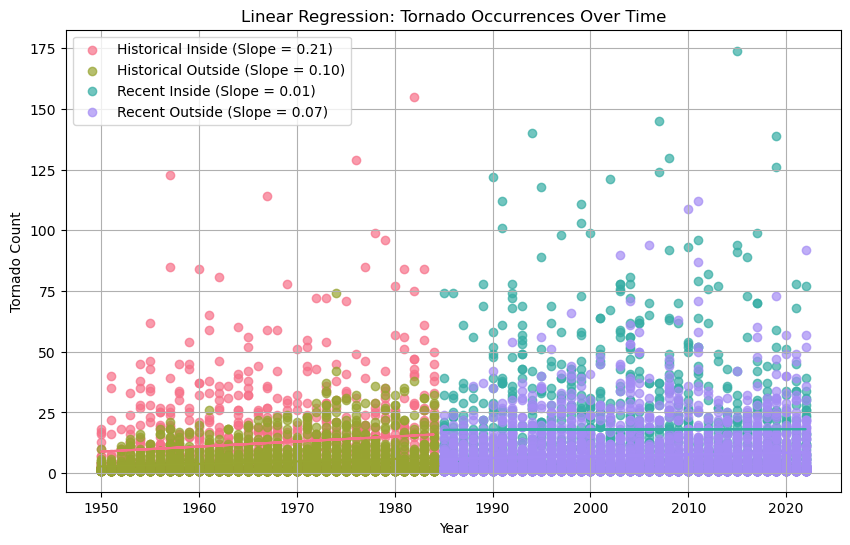

In [9]:
# importing more packages
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns

# combining all the data into a single DataFrame (if not already combined)
all_data = pd.concat([historical_data_inside, historical_data_outside, recent_data_inside, recent_data_outside])

# adding a 'Category' column to distinguish historical and recent data inside and outside Tornado Alley
historical_data_inside['Category'] = 'Historical Inside'
historical_data_outside['Category'] = 'Historical Outside'
recent_data_inside['Category'] = 'Recent Inside'
recent_data_outside['Category'] = 'Recent Outside'

# creating separate DataFrames for each category
categories = ['Historical Inside', 'Historical Outside', 'Recent Inside', 'Recent Outside']

# initializing the linear regression model
model = LinearRegression()

# setting up a color palette to distinguish categories
palette = sns.color_palette("husl", len(categories))

# creating a plot
plt.figure(figsize=(10, 6))

# iterating through each category
for idx, category in enumerate(categories):
    data = all_data[all_data['Category'] == category]
    
    X = data['Year'].values.reshape(-1, 1)
    y = data['Tornado_Count'].values

    # fitting the model
    model.fit(X, y)

    # getting the slope and intercept
    slope = model.coef_[0]
    intercept = model.intercept_
    
    # plotting the data points and trendline for each category
    plt.scatter(X, y, label=f'{category} (Slope = {slope:.2f})', alpha=0.7, color=palette[idx])
    plt.plot(X, model.predict(X), color=palette[idx])

# customizing the plot
plt.title('Linear Regression: Tornado Occurrences Over Time')
plt.xlabel('Year')
plt.ylabel('Tornado Count')
plt.legend()
plt.grid()

# showing the plot
plt.show()

### Which states are seeing the most tornadoes outside of Tornado Alley?

What I really want to focus on from these results is the difference in slope from “Recent Outside” and “Recent Inside” which shows there is a higher slope (0.07) in recent tornado data outside Tornado Alley than inside Tornado Alley (0.01). This may signify and shift in tornado occurrence to the Central-Southeastern United States. To check which states are seeing more tornadoes, we can use the following code. 

In [9]:

# grouping the data by state and calculate the sum of tornado counts
state_tornado_counts = recent_data_outside.groupby('State')['Tornado_Count'].sum()

# sorting the states by tornado counts in descending order and take the top 10
top_states = state_tornado_counts.nlargest(10)

# printing the top 5 states
print("Top 10 States with the Most Tornadoes Outside of Tornado Alley Recently:")
print(top_states)

Top 10 States with the Most Tornadoes Outside of Tornado Alley Recently:
State
FL    2131
MS    1891
IL    1841
AL    1754
MN    1518
GA    1156
NC    1051
TN     945
IN     900
WI     872
Name: Tornado_Count, dtype: int64


This tells us that the states outside of Tornado Alley with the most tornadoes are Florida, Mississippi, Illinois, Alabama, Minnesota, Georgia, North Carolina, Tennessee, Indiana, and Wisconsin. This data supports the claim that Tornado Alley is shifting Southeast, as most of these states are in the Southeast United States. 